In [ ]:
import os
os.chdir('..')
os.chdir('..')

In [ ]:

# import subprocess

# with open('requirements.txt', 'r') as file:
#     packages = file.readlines()

# for package in packages:
#     package = package.strip()  # Remove leading/trailing whitespaces, if any
#     try:
#         subprocess.check_call(["pip", "install", package])
#         print(f"Successfully installed {package}")
#     except Exception as e:
#         print(f"Failed to install {package}: {e}")


In [ ]:
pwd

In [ ]:
import sys

In [ ]:
import os
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [ ]:
pwd

In [ ]:
from ml_grid.util import grid_param_space

In [ ]:
import ipywidgets as ipw
output = ipw.Output()

In [ ]:
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
import os
os.environ["PYTHONWARNINGS"] = "ignore::UserWarning"

In [ ]:
#%pip install hyperopt

In [ ]:
from hyperopt import fmin, tpe, hp

In [ ]:
grid = {
            
            'resample' : ['undersample', 'oversample', None],
            'scale'    : [True, False],
            'feature_n': [100, 95, 75, 50, 25, 5],
            'param_space_size':['medium', 'xsmall'],
            'n_unique_out': [10],
            'outcome_var_n':['1'],
                            'percent_missing':[99, 95, 80],  #n/100 ex 95 for 95% # 99.99, 99.5, 9
                            'corr':[0.98, 0.85, 0.5, 0.25],
                            'data':[{'age':[True, False],
                                    'sex':[True, False],
                                    'bmi':[True],
                                    'ethnicity':[True, False],
                                    'bloods':[True, False],
                                    'diagnostic_order':[True, False],
                                    'drug_order':[True, False],
                                    'annotation_n':[True, False],
                                    'meta_sp_annotation_n':[True, False],
                                    'annotation_mrc_n':[True, False],
                                    'meta_sp_annotation_mrc_n':[True, False],
                                    'core_02':[False],
                                    'bed':[False],
                                    'vte_status':[True],
                                    'hosp_site':[True],
                                    'core_resus':[False],
                                    'news':[False],
                                    'date_time_stamp':[ False]
                                    
                                    }]
        }

In [ ]:
from hyperopt import hp
from hyperopt.pyll import scope

space = {
    'resample': hp.choice('resample', ['undersample', 'oversample', None]),
    'scale': hp.choice('scale', [True, False]),
    'feature_n': hp.choice('feature_n', [100, 95, 75, 50, 25, 5]),
    'param_space_size': hp.choice('param_space_size', ['medium', 'xsmall']),
    'n_unique_out': hp.choice('n_unique_out', [10]),
    'outcome_var_n': hp.choice('outcome_var_n', ['1']),
    'percent_missing': hp.choice('percent_missing', [99, 95, 80]),
    'corr': hp.choice('corr', [0.98, 0.85, 0.5, 0.25]),
    'data': {
        'age': hp.choice('age', [True, False]),
        'sex': hp.choice('sex', [True, False]),
        'bmi': hp.choice('bmi', [True]),
        'ethnicity': hp.choice('ethnicity', [True, False]),
        'bloods': hp.choice('bloods', [True, False]),
        'diagnostic_order': hp.choice('diagnostic_order', [True, False]),
        'drug_order': hp.choice('drug_order', [True, False]),
        'annotation_n': hp.choice('annotation_n', [True, False]),
        'meta_sp_annotation_n': hp.choice('meta_sp_annotation_n', [True, False]),
        'annotation_mrc_n': hp.choice('annotation_mrc_n', [True, False]),
        'meta_sp_annotation_mrc_n': hp.choice('meta_sp_annotation_mrc_n', [True, False]),
        'core_02': hp.choice('core_02', [False]),
        'bed': hp.choice('bed', [False]),
        'vte_status': hp.choice('vte_status', [True]),
        'hosp_site': hp.choice('hosp_site', [True]),
        'core_resus': hp.choice('core_resus', [False]),
        'news': hp.choice('news', [False]),
        'date_time_stamp': hp.choice('date_time_stamp', [False])
    }
}


In [15]:
import ml_grid
import pathlib
import datetime
from tqdm import tqdm
import random

import pandas as pd

from ml_grid.util.project_score_save import project_score_save_class

from ml_grid.pipeline.data import pipe

base_project_dir_global = 'HFE_ML_experiments/'

pathlib.Path(base_project_dir_global).mkdir(parents=True, exist_ok=True) 

st_time = datetime.datetime.now().strftime("%Y-%m-%d_%I-%M-%S_%p")

base_project_dir = 'HFE_ML_experiments/' + st_time + "/"
additional_naming = "HFE_ML_Grid_"

print(base_project_dir)

pathlib.Path(base_project_dir).mkdir(parents=True, exist_ok=True) 

#input_csv_path = '/home/aliencat/samora/HFE/HFE/v20/30163_to_16408_imputed_outcome_grid.csv'

input_csv_path = '/home/aliencat/samora/HFE/HFE/v22/hfe_TC_merge_T_Im_10k_1yr_mean_imputed.csv'

#input_csv_path = '/home/aliencat/samora/HFE/HFE/v24/hfev_1yr_5_to_1_m_19072023.csv'

input_csv_path = '/home/aliencat/samora/HFE/HFE/v23/hfe_TC_merge_mean_Im_10k_1yr_forward_backward_imp_M.csv'

input_csv_path = '/home/aliencat/samora/HFE/HFE/v23/hfe_TC_merge_mean_Im_10k_1yr_forward_backward_imp_M_nonan.csv'

input_csv_path = r'ml_grid\tests\test_data_hfe_1yr_m_small.csv' #large

input_csv_path = r'ml_grid\tests\unit_test_synthetic_time_series_data_large.csv' #large

#init csv to store each local projects results

project_score_save_class(base_project_dir)

n_iter = 1000

grid_iter_obj = grid_param_space.Grid(sample_n=n_iter).settings_list_iterator


def objective(local_param_dict):
    #get settings from iterator over grid of settings space
    #local_param_dict = next(grid_iter_obj)
    print(local_param_dict)
    
    #init random number string
    
    idx = random.randint(0,999999999999999999999)

    #create object from settings
    ml_grid_object = pipe(input_csv_path,
                                                drop_term_list=['chrom', 'hfe', 'phlebo'],
                                                local_param_dict=local_param_dict,
                                                base_project_dir = base_project_dir,
                                                additional_naming = additional_naming,
                                                test_sample_n = 0,
                                                param_space_index = idx,
                                                time_series_mode=True
                                                
                                                )

    from ml_grid.pipeline import main_ts


    #pass object to be evaluated and write results to csv
    res = main_ts.run(ml_grid_object, local_param_dict=local_param_dict).execute()
    
    results_df = pd.read_csv(base_project_dir + 'final_grid_score_log.csv')
    
    highest_metric_from_run = results_df[results_df['i'] == str(idx)].sort_values(by='auc')['auc'].iloc[-1]
    
    display(results_df[results_df['i'] == str(idx)].sort_values(by='auc').iloc[0])
    
    result = {
        "loss": 1-float(highest_metric_from_run),
        "status": "ok"  # Indicate that the evaluation was successful
    }
    return result
    
     

In [16]:
#objective(next(grid_iter_obj))

In [17]:
print("done")

done


In [18]:
# results_df = pd.read_csv(base_project_dir + 'final_grid_score_log.csv')
    
# highest_metric_from_run = results_df[results_df['i'] == str(900424809465212743016)].sort_values(by='auc')['auc'].iloc[-1]

# highest_metric_from_run

In [19]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [20]:
trials = Trials()

{'corr': 0.98, 'data': {'age': True, 'annotation_mrc_n': False, 'annotation_n': True, 'bed': False, 'bloods': False, 'bmi': True, 'core_02': False, 'core_resus': False, 'date_time_stamp': False, 'diagnostic_order': True, 'drug_order': False, 'ethnicity': False, 'hosp_site': True, 'meta_sp_annotation_mrc_n': False, 'meta_sp_annotation_n': True, 'news': False, 'sex': True, 'vte_status': True}, 'feature_n': 25, 'n_unique_out': 10, 'outcome_var_n': '1', 'param_space_size': 'medium', 'percent_missing': 80, 'resample': None, 'scale': True}
Starting... {'corr': 0.98, 'data': {'age': True, 'annotation_mrc_n': False, 'annotation_n': True, 'bed': False, 'bloods': False, 'bmi': True, 'core_02': False, 'core_resus': False, 'date_time_stamp': False, 'diagnostic_order': True, 'drug_order': False, 'ethnicity': False, 'hosp_site': True, 'meta_sp_annotation_mrc_n': False, 'meta_sp_annotation_n': True, 'news': False, 'sex': True, 'vte_status': True}, 'feature_n': 25, 'n_unique_out': 10, 'outcome_var_n':

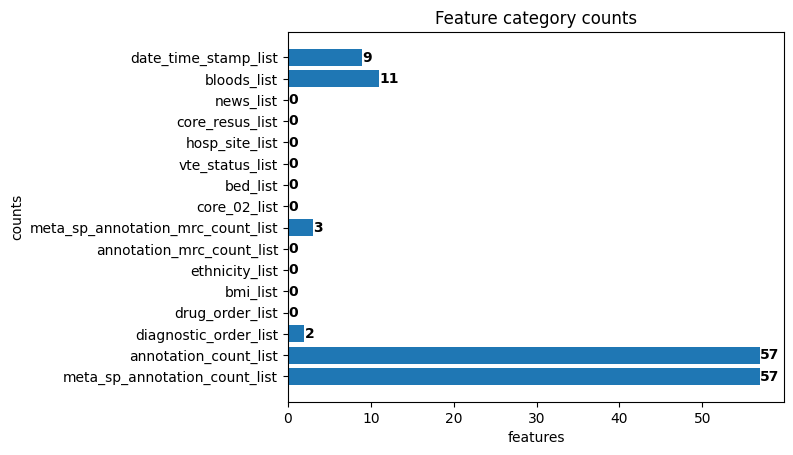

local_param_dict data perturbation:                    
 {'age': True, 'annotation_mrc_n': False, 'annotation_n': True, 'bed': False, 'bloods': False, 'bmi': True, 'core_02': False, 'core_resus': False, 'date_time_stamp': False, 'diagnostic_order': True, 'drug_order': False, 'ethnicity': False, 'hosp_site': True, 'meta_sp_annotation_mrc_n': False, 'meta_sp_annotation_n': True, 'news': False, 'sex': True, 'vte_status': True}
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

In [21]:
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials = trials,
           verbose=1
           )

In [ ]:
best

In [ ]:
results_df = pd.read_csv(base_project_dir + 'final_grid_score_log.csv')

In [ ]:
results_df.sort_values('auc', ascending=False).iloc[0]

In [ ]:
results_df.sort_values('auc', ascending=False)

In [ ]:
from post_processing.helper_functions import feature_encoding_to_feature_names


feature_encoding_to_feature_names(pd.read_csv('../gloabl_files/ml_grid_ts_project/ml_binary_classification_gridsearch_hyperOpt/ml_grid/tests/unit_test_synthetic_time_series_data_large.csv'), results_df)

In [ ]:
break

In [ ]:
from ml_grid.model_classes.nni_sklearn_wrapper import NeuralNetworkClassifier

In [ ]:
idx = 10

In [ ]:
local_param_dict = next(grid_iter_obj)

In [ ]:
ml_grid_object = ml_grid.pipeline.data.pipe(input_csv_path,
                                                drop_term_list=['chrom', 'hfe', 'phlebo'],
                                                local_param_dict=local_param_dict,
                                                base_project_dir = base_project_dir,
                                                additional_naming = additional_naming,
                                                test_sample_n = 0,
                                                param_space_index = idx
                                                
                                                )

In [ ]:
model = NeuralNetworkClassifier().fit(ml_grid_object.X_train, ml_grid_object.y_train)

In [ ]:
model.predict(ml_grid_object.X_test)

In [ ]:
main.run(ml_grid_object, local_param_dict=local_param_dict).execute()

In [ ]:
import shutil
shutil.rmtree('HFE_ML_experiments/')

In [ ]:
column_list == column_list1

In [ ]:
#compute param grid for all then normalise... for 1:1 for each method

#apply max for under util

In [ ]:
%pip install lightgbm

In [ ]:
ml_grid_object.X_train

In [ ]:
from ml_grid.model_classes.light_gbm_class import LightGBMClassifierWrapper

In [ ]:
LightGBMClassifierWrapper(parameter_space_size=10)

In [ ]:
from ml_grid.model_classes.quadratic_discriminant_class import \
    quadratic_discriminant_analysis_class

In [ ]:
qd = quadratic_discriminant_analysis_class(
                X=ml_grid_object.X_train, y=ml_grid_object.y_train, parameter_space_size=parameter_space_size)

In [ ]:
qd

In [ ]:
parameter_space_size = 'medium'

In [ ]:
lgbm = LightGBMClassifierWrapper(X=ml_grid_object.X_train, y=ml_grid_object.y_train,
                                     parameter_space_size=parameter_space_size)

In [ ]:
lgbm.algorithm_implementation.fit(ml_grid_object.X_train, ml_grid_object.y_train)

In [ ]:
current_algorithm = lgbm.algorithm_implementation

In [ ]:
n_iter_v = 100

In [ ]:
grid_n_jobs = 2

In [ ]:
parameters = lgbm.parameter_space

In [ ]:
from sklearn import metrics
from sklearn.metrics import *
from sklearn.metrics import (classification_report, f1_score, make_scorer,
                             matthews_corrcoef, roc_auc_score)
from sklearn.model_selection import (GridSearchCV, ParameterGrid,
                                     RandomizedSearchCV, RepeatedKFold,
                                     cross_validate)
import numpy as np

In [ ]:
grid = RandomizedSearchCV(current_algorithm, parameters,
                                    verbose=1, cv=[(slice(None), slice(None))],
                                    n_jobs =grid_n_jobs, n_iter = n_iter_v, error_score=np.nan)

In [ ]:
grid.fit(ml_grid_object.X_train, ml_grid_object.y_train)

In [ ]:
grid.best_estimator_

In [ ]:
from ml_grid.pipeline.data_feature_importance_methods.feature_importance_methods import getNfeaturesANOVAF

In [ ]:
#100 trials #1258 rows × 52 columns TESYTTTTTTTT WARNING WAS ONLY ON 100 SAMPLE!!!
space = {
    'resample': hp.choice('resample', ['undersample', 'oversample', None]),
    'scale': hp.choice('scale', [True, False]),
    'feature_n': hp.choice('feature_n', [100, 95, 75, 50, 25, 5]),
    'param_space_size': hp.choice('param_space_size', ['medium', 'xsmall']),
    'n_unique_out': hp.choice('n_unique_out', [10]),
    'outcome_var_n': hp.choice('outcome_var_n', ['1']),
    'percent_missing': hp.choice('percent_missing', [99, 95, 80]),
    'corr': hp.choice('corr', [0.98, 0.85, 0.5, 0.25]),
    'data': {
        'age': hp.choice('age', [True, False]),
        'sex': hp.choice('sex', [True, False]),
        'bmi': hp.choice('bmi', [True]),
        'ethnicity': hp.choice('ethnicity', [True, False]),
        'bloods': hp.choice('bloods', [True, False]),
        'diagnostic_order': hp.choice('diagnostic_order', [True, False]),
        'drug_order': hp.choice('drug_order', [True, False]),
        'annotation_n': hp.choice('annotation_n', [True, False]),
        'meta_sp_annotation_n': hp.choice('meta_sp_annotation_n', [True, False]),
        'annotation_mrc_n': hp.choice('annotation_mrc_n', [True, False]),
        'meta_sp_annotation_mrc_n': hp.choice('meta_sp_annotation_mrc_n', [True, False]),
        'core_02': hp.choice('core_02', [False]),
        'bed': hp.choice('bed', [False]),
        'vte_status': hp.choice('vte_status', [True]),
        'hosp_site': hp.choice('hosp_site', [True]),
        'core_resus': hp.choice('core_resus', [False]),
        'news': hp.choice('news', [False]),
        'date_time_stamp': hp.choice('date_time_stamp', [False])
    }


{'age': 1,
 'annotation_mrc_n': 1,
 'annotation_n': 1,
 'bed': 0,
 'bloods': 1,
 'bmi': 0,
 'core_02': 0,
 'core_resus': 0,
 'corr': 1,
 'date_time_stamp': 0,
 'diagnostic_order': 0,
 'drug_order': 0,
 'ethnicity': 1,
 'feature_n': 3,
 'hosp_site': 0,
 'meta_sp_annotation_mrc_n': 1,
 'meta_sp_annotation_n': 1,
 'n_unique_out': 0,
 'news': 0,
 'outcome_var_n': 0,
 'param_space_size': 1,
 'percent_missing': 1,
 'resample': 0,
 'scale': 1,
 'sex': 1,
 'vte_status': 0}